# 实验二：回归模型
- 姓名：姜志凯
- 学号：2011937
- 专业：信息安全

### 实验要求
- 回归是监督学习的一个重要问题，回归用于预测输入变量和输出变量之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系
- 本次实验的目的是通过酒的各种特征预测酒的质量评级，数据集给出的是酒的各种特征以及对应的标签，即质量评级
- 完成下述基本要求、中级要求、高级要求

**截止日期：10月21日**
- 作业的提交格式参考之前的说明，提交到2120220594@nankai.edu.cn

### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
- 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
- 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。

### 高级要求
- 编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法均可）。

### 导入需要的包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from numpy.linalg import inv

In [3]:
# 导入数据 前边的各项是酒的各种特征，最后一列为酒的质量评级
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 对数据集进行预处理：
- 对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。
- 常用的预处理方法有：标准化、归一化和中心化。本实验选择中心化。
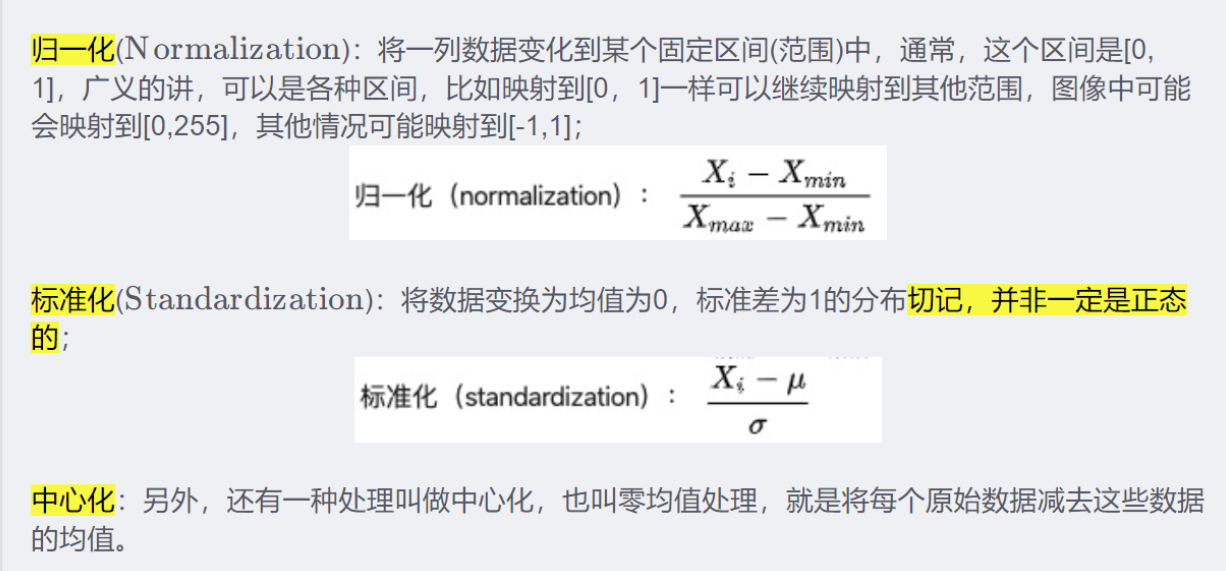

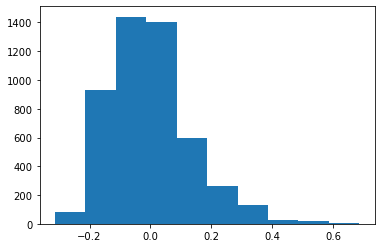

In [4]:
# 对数据集进行中心化处理
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]
X = Normalization_fun(X)
y = data.iloc[:, -1]

# 可视化测试数据集中心化后的sulphates特征
plt.hist(X["sulphates"])
plt.show()

### 划分数据集（分层抽样）

In [5]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
X = data0
# 划分
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [6]:
# 初始化回归系数
coefs_init = np.random.random(X_train.shape[1])
coefs_init

array([0.94518411, 0.73964618, 0.47272953, 0.27828122, 0.44707434,
       0.78202939, 0.3937782 , 0.70807046, 0.04305841, 0.07309817,
       0.82950477, 0.70077664])

In [7]:
# 训练集标签
print(y_train)
print(X_train)
print(X_train.shape[0])
print(y_train.shape[0])

[7 7 5 ... 5 7 6]
[[ 1.         -0.12065266 -0.06690306 ...  0.10157578 -0.20912427
   0.15898919]
 [ 1.         -0.06296035  0.02133224 ...  0.06521215 -0.11610102
   0.38479564]
 [ 1.         -0.04372958 -0.00807953 ... -0.06206058 -0.01144986
  -0.17972049]
 ...
 [ 1.          0.19665503  0.04094008 ... -0.05296967 -0.17424055
  -0.17972049]
 [ 1.         -0.04372958 -0.02768737 ...  0.11066669  0.10482921
   0.04608596]
 [ 1.          0.08127042  0.09976361 ... -0.23478785 -0.0928452
   0.49769886]]
3918
3918


In [8]:
# 求均方误差MES
def MES(coefs,X,y):
    sum = 0
    for i in range(len(y)):
        sum += (y[i]-y_pred(X[i],coefs)) ** 2
    return sum / X.shape[0]

In [9]:
# 求预测值
def y_pred(X, coef):
    y = 0
    for i in range(len(X)):
        y += float(coef[i]) * float(X[i])
    return y

## 1批量梯度下降

In [10]:
def batch_gradient_descent(X,y,coefs,learn_rate=0.3,epoches=50):
    """
    批量梯度下降算法
    :param X: 特征集
    :param y: 标签
    :param coefs: 回归参数
    :param learn_rate: 学习率，也就是公式中的alpha
    :param epoches: 下降次数
    :return: 返回12维的参数值和MES值列表
    """
    mes_list = []
    mes_list.append(MES(coefs,X,y))
    for epoch in range(epoches):
        for j in range(len(coefs)):
            sum = 0
            for i in range(X.shape[0]):
                sum += (y[i] - y_pred(X[i],coefs))*X[i][j]
            chg = learn_rate*sum/len(y)
            coefs[j] += chg
        mes_list.append(MES(coefs,X,y))
    return coefs,mes_list

### 1.1批量梯度下降优化参数并求出训练集和测试集的均方误差

In [11]:
# 参数优化
coefs,mes_batch = batch_gradient_descent(X_train,y_train,coefs_init,0.5,400)
# 训练集均方误差
batch_train_mes = mes_batch[-1]
print(batch_train_mes)
# 测试集均方误差
batch_test_mes = MES(coefs,X_test,y_test)
print(batch_test_mes)

0.5712949926723613
0.5893641125900853


### 1.2批量梯度下降MES收敛曲线

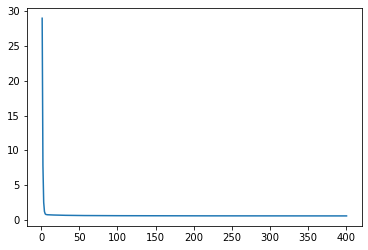

In [12]:
xaxis=np.arange(1,len(mes_batch)+1)
mes_batch=np.array(mes_batch)
plt.plot(xaxis,mes_batch)

## 2随机梯度下降

In [11]:
def random_gradient_descent(X,y,coefs,learn_rate=0.3,epoches=50):
    """
    随机梯度下降算法
    :param X: 特征集
    :param y: 标签
    :param coefs: 回归参数
    :param learn_rate: 学习率，也就是公式中的alpha
    :param epoches: 下降次数
    :return: 返回12维的参数值和MES值列表
    """
    mes_list = []
    mes_list.append(MES(coefs,X,y))
    for epoch in range(epoches):
        for j in range(len(coefs)):
            sum = 0
            temp = np.random.choice(len(y))
            sum = (y[temp] - y_pred(X[temp],coefs))*X[temp][j]
            chg = learn_rate*sum
            coefs[j] += chg
        mes_list.append(MES(coefs,X,y))
    return coefs,mes_list

### 2.1随机梯度下降优化参数并求出训练集和测试集的均方误差

In [37]:
# 参数优化
coefs_,mes_random = random_gradient_descent(X_train,y_train,coefs_init,0.5,400)
# 训练集均方误差
random_train_mes = mes_random[-1]
print(random_train_mes)
# 测试集均方误差
random_test_mes = MES(coefs_,X_test,y_test)
print(random_test_mes)

0.5991960369078806
0.6141958730503003


### 2.2随机梯度下降MES收敛曲线

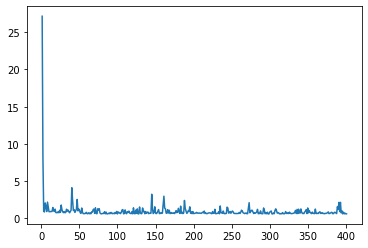

In [38]:
xaxis_=np.arange(1,len(mes_random)+1)
mes_random=np.array(mes_random)
plt.plot(xaxis_,mes_random)

## 3探究最佳学习率

### 3.1批量梯度下降

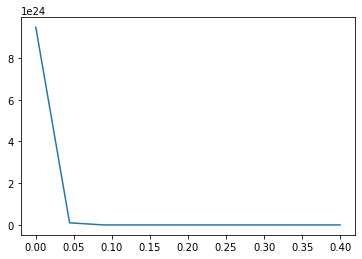

In [14]:
# 学习率列表
learn_rate_list=np.linspace(0,0.4,10)
mes_batch_list = []
for i in learn_rate_list:
    phd,mes1 = batch_gradient_descent(X_train,y_train,coefs_init,i,50)
    mes_batch_list.append(mes1[-1])
# 绘图
batch_xaxis=np.array(learn_rate_list)
mes_batch_list=np.array(mes_batch_list)
plt.plot(batch_xaxis,mes_batch_list)
plt.show()

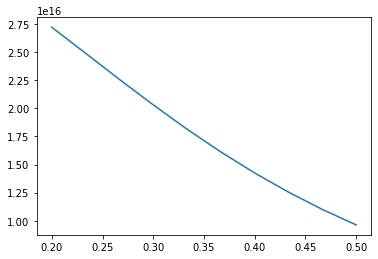

In [17]:
# 学习率列表
learn_rate_list=np.linspace(0.2,0.5,10)
mes_batch_list = []
for i in learn_rate_list:
    phd,mes1 = batch_gradient_descent(X_train,y_train,coefs_init,i,50)
    mes_batch_list.append(mes1[-1])
# 绘图
batch_xaxis=np.array(learn_rate_list)
mes_batch_list=np.array(mes_batch_list)
plt.plot(batch_xaxis,mes_batch_list)
plt.show()

- 如图可以分析出学习率在0.1到0.3之间，模型的学习结果差不多，所以在这个范围内学习效果都不错。

### 3.2随机梯度下降

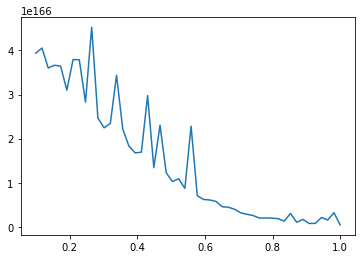

In [22]:
# 学习率列表
learn_rate_list=np.linspace(0.1,1,50)
mes_random_list = []
for i in learn_rate_list:
    phd,mes2 = random_gradient_descent(X_train,y_train,coefs_init,i,50)
    mes_random_list.append(mes2[-1])
# 绘图
random_xaxis=np.array(learn_rate_list)
mes_random_list=np.array(mes_random_list)
plt.plot(random_xaxis,mes_random_list)

- 如图可以看出，学习率对随机梯度下降的学习结果的影响波动较大，因为随机梯度下降本身就具有随机性，但由于其运行速度快，在某些方面的效果优于批量梯度下降。
- 所以单从这张图上，很难得出最佳的学习率，但大致可以看出大约在0.93时，mse较小，学习效果不错。

## 4探究回归模型在机器学习和统计学上的差异

- 统计学中的回归模型：寻找自变量和因变量之间的关系，并估计出二者之间的函数关系来描述，回归是一种统计方法。
- 机器学习中的回归模型：基于回归的统计方法，寻找特征和标签之间的关系，拟合二者的函数关系以达到预测任意特征的标签的作用。
- 所以二者的目的不同，统计学只关心变量之间的关系，而机器学习是要利用这种关系来达到实际的目的——预测，机器学习更看重结果。
- 统计学和机器学习生成回归函数的过程也不同：
- 1、对于统计学中的回归模型，只要最小化数据的均方误差即可，不需要划分训练测试集来训练和测试；
- 2、对于机器学习，需要对数据集进行划分，划分为训练集和测试集，求得回归函数，然后求得在测试集上的最佳性能。
- 因此，机器学习是基于统计学的，机器学习是由于社会进步对于生产力的需求，发展出来的适合于某些工作的方法论，对于现代社会非常有用，但统计学作为古老的学科，其巨大作用仍无法泯灭。

## 5岭回归

In [39]:
def Ridge(num,X_train,y_train):
    temp = np.diag([num] * len(coefs_init))
    coef = ((inv(X_train.T.dot(X_train) + temp)).dot(X_train.T)).dot(y_train)
    return np.array(coef)

In [40]:
coefs_L=Ridge(1,X_train,y_train)
print(MES(coefs_L,X_train,y_train))
print(MES(coefs_L,X_test,y_test))

0.5634413939639162
0.5840517510152756
